# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [1]:
%pip install iso3166

### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [2]:
%pip install --upgrade plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 42.3 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.15.0
    Uninstalling plotly-5.15.0:
      Successfully uninstalled plotly-5.15.0


### Import Statements

In [3]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [4]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [5]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`?
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [9]:
df_data

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success
...,...,...,...,...,...,...,...,...,...
4319,4319,4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,4320,4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success
4321,4321,4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,4322,4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success


In [6]:
df_data.shape

(4324, 9)

In [7]:
df_data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Organisation', 'Location', 'Date',
       'Detail', 'Rocket_Status', 'Price', 'Mission_Status'],
      dtype='object')

## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data.

In [8]:
df_data.isna().values.any()

True

In [11]:
clean_df = df_data.dropna()

In [10]:
df_data.duplicated().values.any()

False

In [13]:
# Dropping unnamed columns:
clean_df.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1, inplace=True)

<ipython-input-13-c84442956b40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1, inplace=True)


## Descriptive Statistics

In [14]:
clean_df.describe()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
count,964,964,964,964,964,964,964
unique,25,56,963,962,2,56,4
top,CASC,"LC-39A, Kennedy Space Center, Florida, USA","Wed Nov 05, 2008 00:15 UTC",Long March 2D | Shiyan-3 & Chuangxin-1(02),StatusActive,450.0,Success
freq,158,120,2,2,586,136,910


In [15]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 964 entries, 0 to 4020
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Organisation    964 non-null    object
 1   Location        964 non-null    object
 2   Date            964 non-null    object
 3   Detail          964 non-null    object
 4   Rocket_Status   964 non-null    object
 5   Price           964 non-null    object
 6   Mission_Status  964 non-null    object
dtypes: object(7)
memory usage: 60.2+ KB


# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [20]:
launches_by_company = clean_df.groupby('Organisation').count().sort_values("Mission_Status", ascending=False)['Mission_Status']
launches_by_company

Organisation
CASC               158
NASA               149
SpaceX              99
ULA                 98
Arianespace         96
Northrop            83
ISRO                67
MHI                 37
VKS RF              33
US Air Force        26
Roscosmos           23
Kosmotras           22
ILS                 13
Eurockot            13
Rocket Lab          13
Martin Marietta      9
Lockheed             8
Boeing               7
JAXA                 3
RVSN USSR            2
ESA                  1
EER                  1
Sandia               1
ExPace               1
Virgin Orbit         1
Name: Mission_Status, dtype: int64

In [24]:
bar = px.bar(x=launches_by_company.index,
             y=launches_by_company.values,
             title="Total Launches by Company",
             color=launches_by_company.values,
             color_continuous_scale="agsunset")
bar.update_layout(xaxis_title="Company",
                  yaxis_title="Number of Launches",
                  coloraxis_showscale=False)
bar.show()

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned?

In [25]:
clean_df.groupby('Rocket_Status').count()["Detail"]

Rocket_Status
StatusActive     586
StatusRetired    378
Name: Detail, dtype: int64

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [26]:
clean_df.groupby('Mission_Status').count()["Detail"]

Mission_Status
Failure               36
Partial Failure       17
Prelaunch Failure      1
Success              910
Name: Detail, dtype: int64

# How Expensive are the Launches?

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values).

In [31]:
clean_df.Price = pd.to_numeric(clean_df.Price.str.replace(",", ""))

<ipython-input-31-2f4c84910f74>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [38]:
histogram = px.histogram(clean_df,
                         x='Price',
                         nbins=70)
histogram.update_layout(xaxis_title="Cost of Launch in USD Millions", yaxis_title="Number of Launches")
histogram.show()

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map.
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [42]:
clean_df

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.00,Success
5,CASC,"LC-9, Taiyuan Satellite Launch Center, China","Sat Jul 25, 2020 03:13 UTC","Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success
...,...,...,...,...,...,...,...
3855,US Air Force,"SLC-4W, Vandenberg AFB, California, USA","Fri Jul 29, 1966 18:43 UTC",Titan IIIB | KH-8,StatusRetired,59.00,Success
3971,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA","Thu May 06, 1965 15:00 UTC",Titan IIIA | LES 2 & LCS 1,StatusRetired,63.23,Success
3993,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA","Thu Feb 11, 1965 15:19 UTC",Titan IIIA | LES 1,StatusRetired,63.23,Success
4000,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA","Thu Dec 10, 1964 16:52 UTC",Titan IIIA | Transtage 2,StatusRetired,63.23,Success


In [49]:
replacements = {"Russia": "Russian Federation", "New Mexico": "USA", "Yellow Sea": "China", "Shahrud Missile Test Site": "Iran",
                "Pacific Missile Range Facility": "USA", "Barents Sea": "Russian Federation", "Gran Canaria": "USA"}

In [50]:
country_column = clean_df['Location'].str.split(', ').str[-1].str.strip()
for key in replacements:
  country_column = country_column.str.replace(key, replacements[key])

In [51]:
clean_df.insert(1, 'Country', country_column)
clean_df.head()

,Organisation,Country,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,USA,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success
1,CASC,China,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
3,Roscosmos,Kazakhstan,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success
4,ULA,USA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.00,Success
5,CASC,China,"LC-9, Taiyuan Satellite Launch Center, China","Sat Jul 25, 2020 03:13 UTC","Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success


In [54]:
# Custom function to return alpha-3 codes from country name:
def get_alpha3(country_name):
    try:
        return countries.get(country_name).alpha3
    except KeyError:
        return None

In [55]:
alpha3_codes = country_column.apply(get_alpha3)
alpha3_codes

0       USA
1       CHN
3       KAZ
4       USA
5       CHN
       ... 
3855    USA
3971    USA
3993    USA
4000    USA
4020    USA
Name: Location, Length: 964, dtype: object

In [56]:
clean_df.insert(2, 'Country_ISO', alpha3_codes)

In [64]:
launches_by_country_iso = pd.DataFrame(clean_df.groupby(['Country_ISO', 'Country']).count()).reset_index()[['Country_ISO', 'Country', 'Detail']]
launches_by_country_iso

,Country_ISO,Country,Detail
0,CHN,China,159
1,FRA,France,95
2,IND,India,67
3,JPN,Japan,40
4,KAZ,Kazakhstan,46
5,NZL,New Zealand,13
6,RUS,Russian Federation,54
7,USA,USA,490


In [66]:
world_map = px.choropleth(launches_by_country_iso,
                           locations='Country_ISO',
                           color='Detail',
                           hover_name='Country',
                           color_continuous_scale='matter')
world_map.show()

# Use a Choropleth Map to Show the Number of Failures by Country


In [68]:
clean_df.head()

,Organisation,Country,Country_ISO,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,USA,USA,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success
1,CASC,China,CHN,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
3,Roscosmos,Kazakhstan,KAZ,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success
4,ULA,USA,USA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.00,Success
5,CASC,China,CHN,"LC-9, Taiyuan Satellite Launch Center, China","Sat Jul 25, 2020 03:13 UTC","Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success


In [85]:
failure_or_success = clean_df.Mission_Status.str.replace("Partial Failure", "Failure").str.replace("Prelaunch Failure", "Failure")
failures_success_country = pd.concat([clean_df.Country_ISO, clean_df.Country, failure_or_success, clean_df.Detail], axis=1)
failures_success_country = failures_success_country.groupby(['Country_ISO', 'Country', 'Mission_Status']).count()['Detail'].reset_index()

In [87]:
failures_by_country = failures_success_country[failures_success_country.Mission_Status == "Failure"]
failures_by_country.head()

,Country_ISO,Country,Mission_Status,Detail
0,CHN,China,Failure,7
2,FRA,France,Failure,3
4,IND,India,Failure,8
7,KAZ,Kazakhstan,Failure,3
9,NZL,New Zealand,Failure,2


In [92]:
failures_country_map = px.choropleth(failures_by_country,
                                     locations='Country_ISO',
                                     color='Detail',
                                     hover_name='Country',
                                     color_continuous_scale='matter',
                                     title='Launch Failures by Country')
failures_country_map.show()

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status.

In [96]:
country_organisation_status = clean_df.groupby(['Country', 'Organisation', 'Mission_Status']).count()['Detail'].reset_index()

In [98]:
sunburst = px.sunburst(country_organisation_status,
                       path=['Country', 'Organisation', 'Mission_Status'],
                       values='Detail',
                       title='Number of Successful and Failed Space Launches by Countries and Organisations')
sunburst.show()

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [101]:
clean_df.head()

,Organisation,Country,Country_ISO,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,USA,USA,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success
1,CASC,China,CHN,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
3,Roscosmos,Kazakhstan,KAZ,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success
4,ULA,USA,USA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.00,Success
5,CASC,China,CHN,"LC-9, Taiyuan Satellite Launch Center, China","Sat Jul 25, 2020 03:13 UTC","Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success


In [104]:
money_spent = clean_df.groupby(['Country', 'Organisation'])["Price"].sum().reset_index()
money_spent

,Country,Organisation,Price
0,China,CASC,"6,340.26"
1,China,ExPace,28.30
2,France,Arianespace,"16,248.00"
3,France,ESA,37.00
4,India,ISRO,"2,177.00"
5,Japan,JAXA,168.00
6,Japan,MHI,"3,532.50"
7,Kazakhstan,Arianespace,97.00
8,Kazakhstan,ILS,325.00
9,Kazakhstan,Kosmotras,348.00


In [107]:
 cost_bar = px.bar(money_spent.sort_values('Price', ascending=False),
                   x='Organisation',
                   y='Price',
                   color='Price',
                   color_continuous_scale='sunset',
                   title='Total Amount of Money Spent by Organisation on Space Missions')
 cost_bar.update_layout(xaxis_title="Organisation",
                        yaxis_title="Money Spent in USD Millions")
 cost_bar.show()

# Analyse the Amount of Money Spent by Organisation per Launch

In [118]:
clean_df.groupby('Organisation').Price.describe()

,count,mean,std,min,25%,50%,75%,max
Organisation,,,,,,,,
Arianespace,96.00,170.26,61.73,37.00,200.00,200.00,200.00,200.00
Boeing,7.00,177.29,77.72,133.00,133.00,164.00,164.00,350.00
CASC,158.00,40.13,19.16,5.30,29.75,30.80,64.68,69.70
EER,1.00,20.00,NaN,20.00,20.00,20.00,20.00,20.00
ESA,1.00,37.00,NaN,37.00,37.00,37.00,37.00,37.00
Eurockot,13.00,41.80,0.00,41.80,41.80,41.80,41.80,41.80
ExPace,1.00,28.30,NaN,28.30,28.30,28.30,28.30,28.30
ILS,13.00,101.54,32.56,65.00,65.00,109.00,130.00,153.00
ISRO,67.00,32.49,11.71,21.00,25.00,31.00,39.00,62.00


# Chart the Number of Launches per Year

In [125]:
print(clean_df.iloc[348])

Organisation                                            Sandia
Country                                                    USA
Country_ISO                                                USA
Location          LP-41, Kauai, Pacific Missile Range Facility
Date                                          Wed Nov 04, 2015
Detail                Super Stripy | HiakaSat, STACEM & Others
Rocket_Status                                     StatusActive
Price                                                    15.00
Mission_Status                                         Failure
Name: 481, dtype: object


In [127]:
date_objects = pd.to_datetime(clean_df.Date, format='%a %b %d, %Y %H:%M %Z', errors='coerce')

In [128]:
clean_df.Date = date_objects

<ipython-input-128-41c4a016c47b>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [135]:
year_of_launch = clean_df.Date.dt.year.astype('Int64')
clean_df.insert(5, 'Year', year_of_launch)

In [141]:
launches_per_year = pd.DataFrame(clean_df.groupby('Year').count()['Detail'].reset_index())

In [145]:
launches_year_bar = px.bar(launches_per_year,
                           x='Year',
                           y='Detail',
                           title="Number of Space Launches per Year",
                           color='Detail',
                           color_continuous_scale='geyser')
launches_year_bar.update_layout(xaxis_title='Year',
                                yaxis_title='Number of Launches')
launches_year_bar.show()

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart.

In [146]:
month_of_launch = clean_df.Date.dt.month.astype('Int64')
clean_df.insert(6, 'Month', month_of_launch)

In [151]:
monthly_launches = clean_df.resample('M', on='Date').size()
monthly_launches

Date
1964-09-30 00:00:00+00:00     1
1964-10-31 00:00:00+00:00     0
1964-11-30 00:00:00+00:00     0
1964-12-31 00:00:00+00:00     1
1965-01-31 00:00:00+00:00     0
                             ..
2020-04-30 00:00:00+00:00     4
2020-05-31 00:00:00+00:00     6
2020-06-30 00:00:00+00:00     7
2020-07-31 00:00:00+00:00    12
2020-08-31 00:00:00+00:00     2
Length: 672, dtype: int64

In [159]:
rolled_data = monthly_launches.rolling(window=10, min_periods=1).mean()
rolled_data

Date
1964-09-30 00:00:00+00:00   1.00
1964-10-31 00:00:00+00:00   0.50
1964-11-30 00:00:00+00:00   0.33
1964-12-31 00:00:00+00:00   0.50
1965-01-31 00:00:00+00:00   0.40
                            ... 
2020-04-30 00:00:00+00:00   6.80
2020-05-31 00:00:00+00:00   6.70
2020-06-30 00:00:00+00:00   6.40
2020-07-31 00:00:00+00:00   7.10
2020-08-31 00:00:00+00:00   6.80
Length: 672, dtype: float64

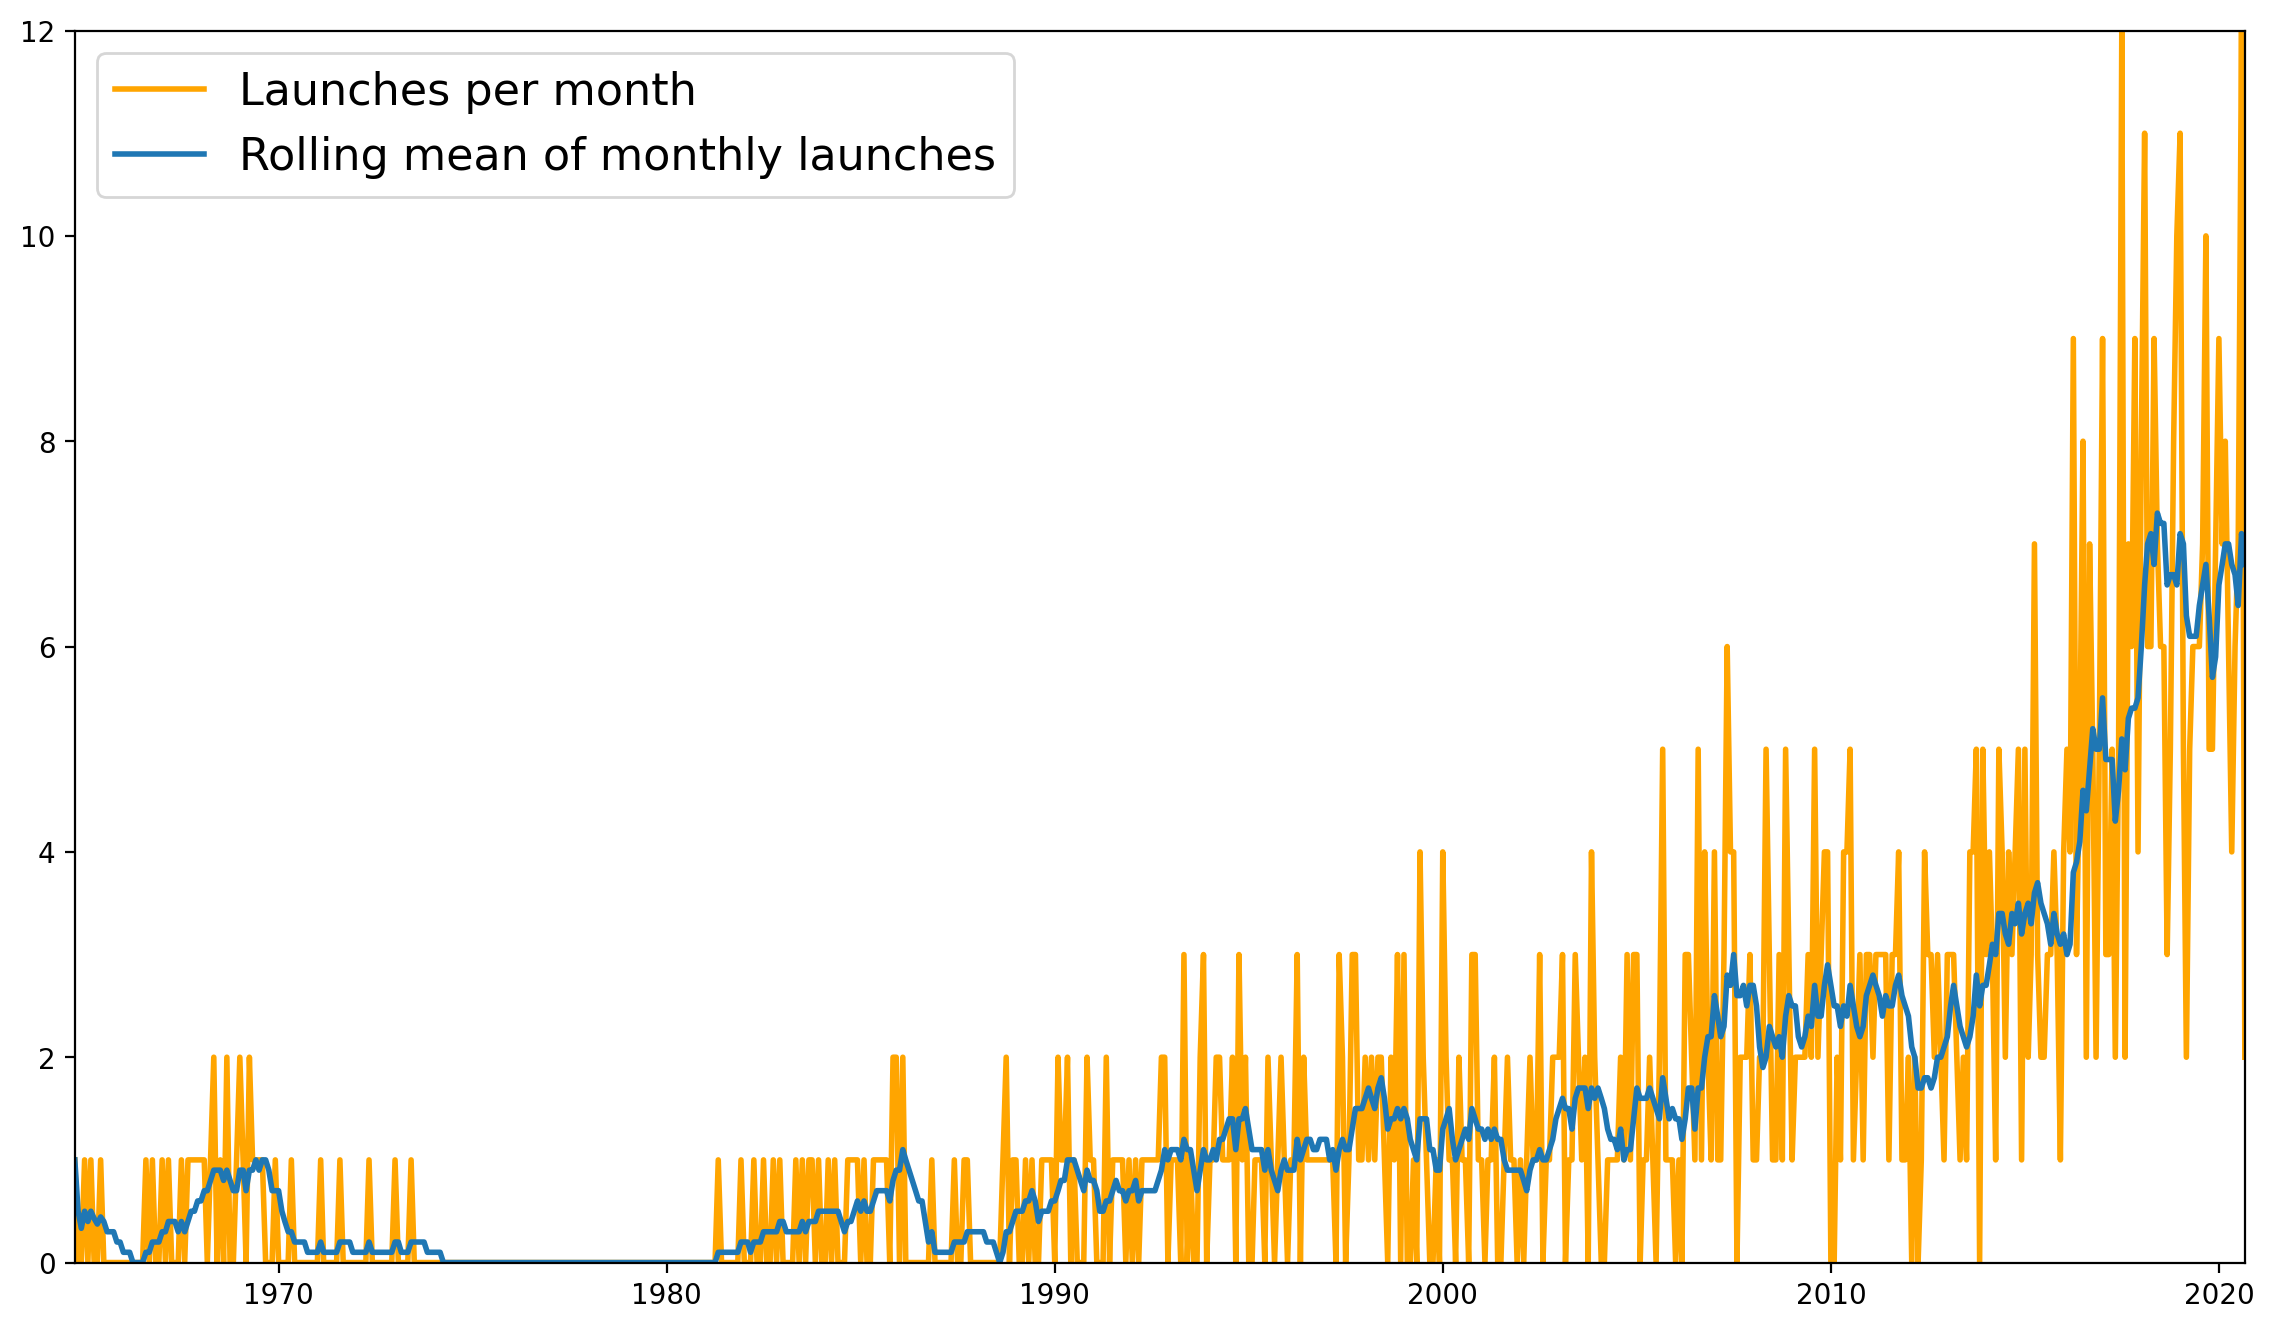

In [163]:
plt.figure(figsize=(14, 8), dpi=200)
plt.plot(monthly_launches.index, monthly_launches.values, linewidth=2, color='orange', label='Launches per month')
plt.plot(rolled_data.index, rolled_data.values, linewidth=2, label='Rolling mean of monthly launches')

plt.xlim(rolled_data.index.min(), rolled_data.index.max())
plt.ylim(0, 12)
plt.legend(fontsize=16)
plt.show()

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [167]:
launches_by_month = clean_df.groupby('Month').size()

In [175]:
launches_by_month[launches_by_month.values == launches_by_month.values.max()]

Month
12    91
dtype: int64

In [176]:
launches_by_month[launches_by_month.values == launches_by_month.values.min()]

Month
2    60
dtype: int64

# How has the Launch Price varied Over Time?

Create a line chart that shows the average price of rocket launches over time.

In [181]:
mean_price_per_year = clean_df.groupby('Year').Price.mean()
mean_price_per_year.head()

Year
1964    63.23
1965    63.23
1966    59.00
1967   216.29
1968   279.20
Name: Price, dtype: float64

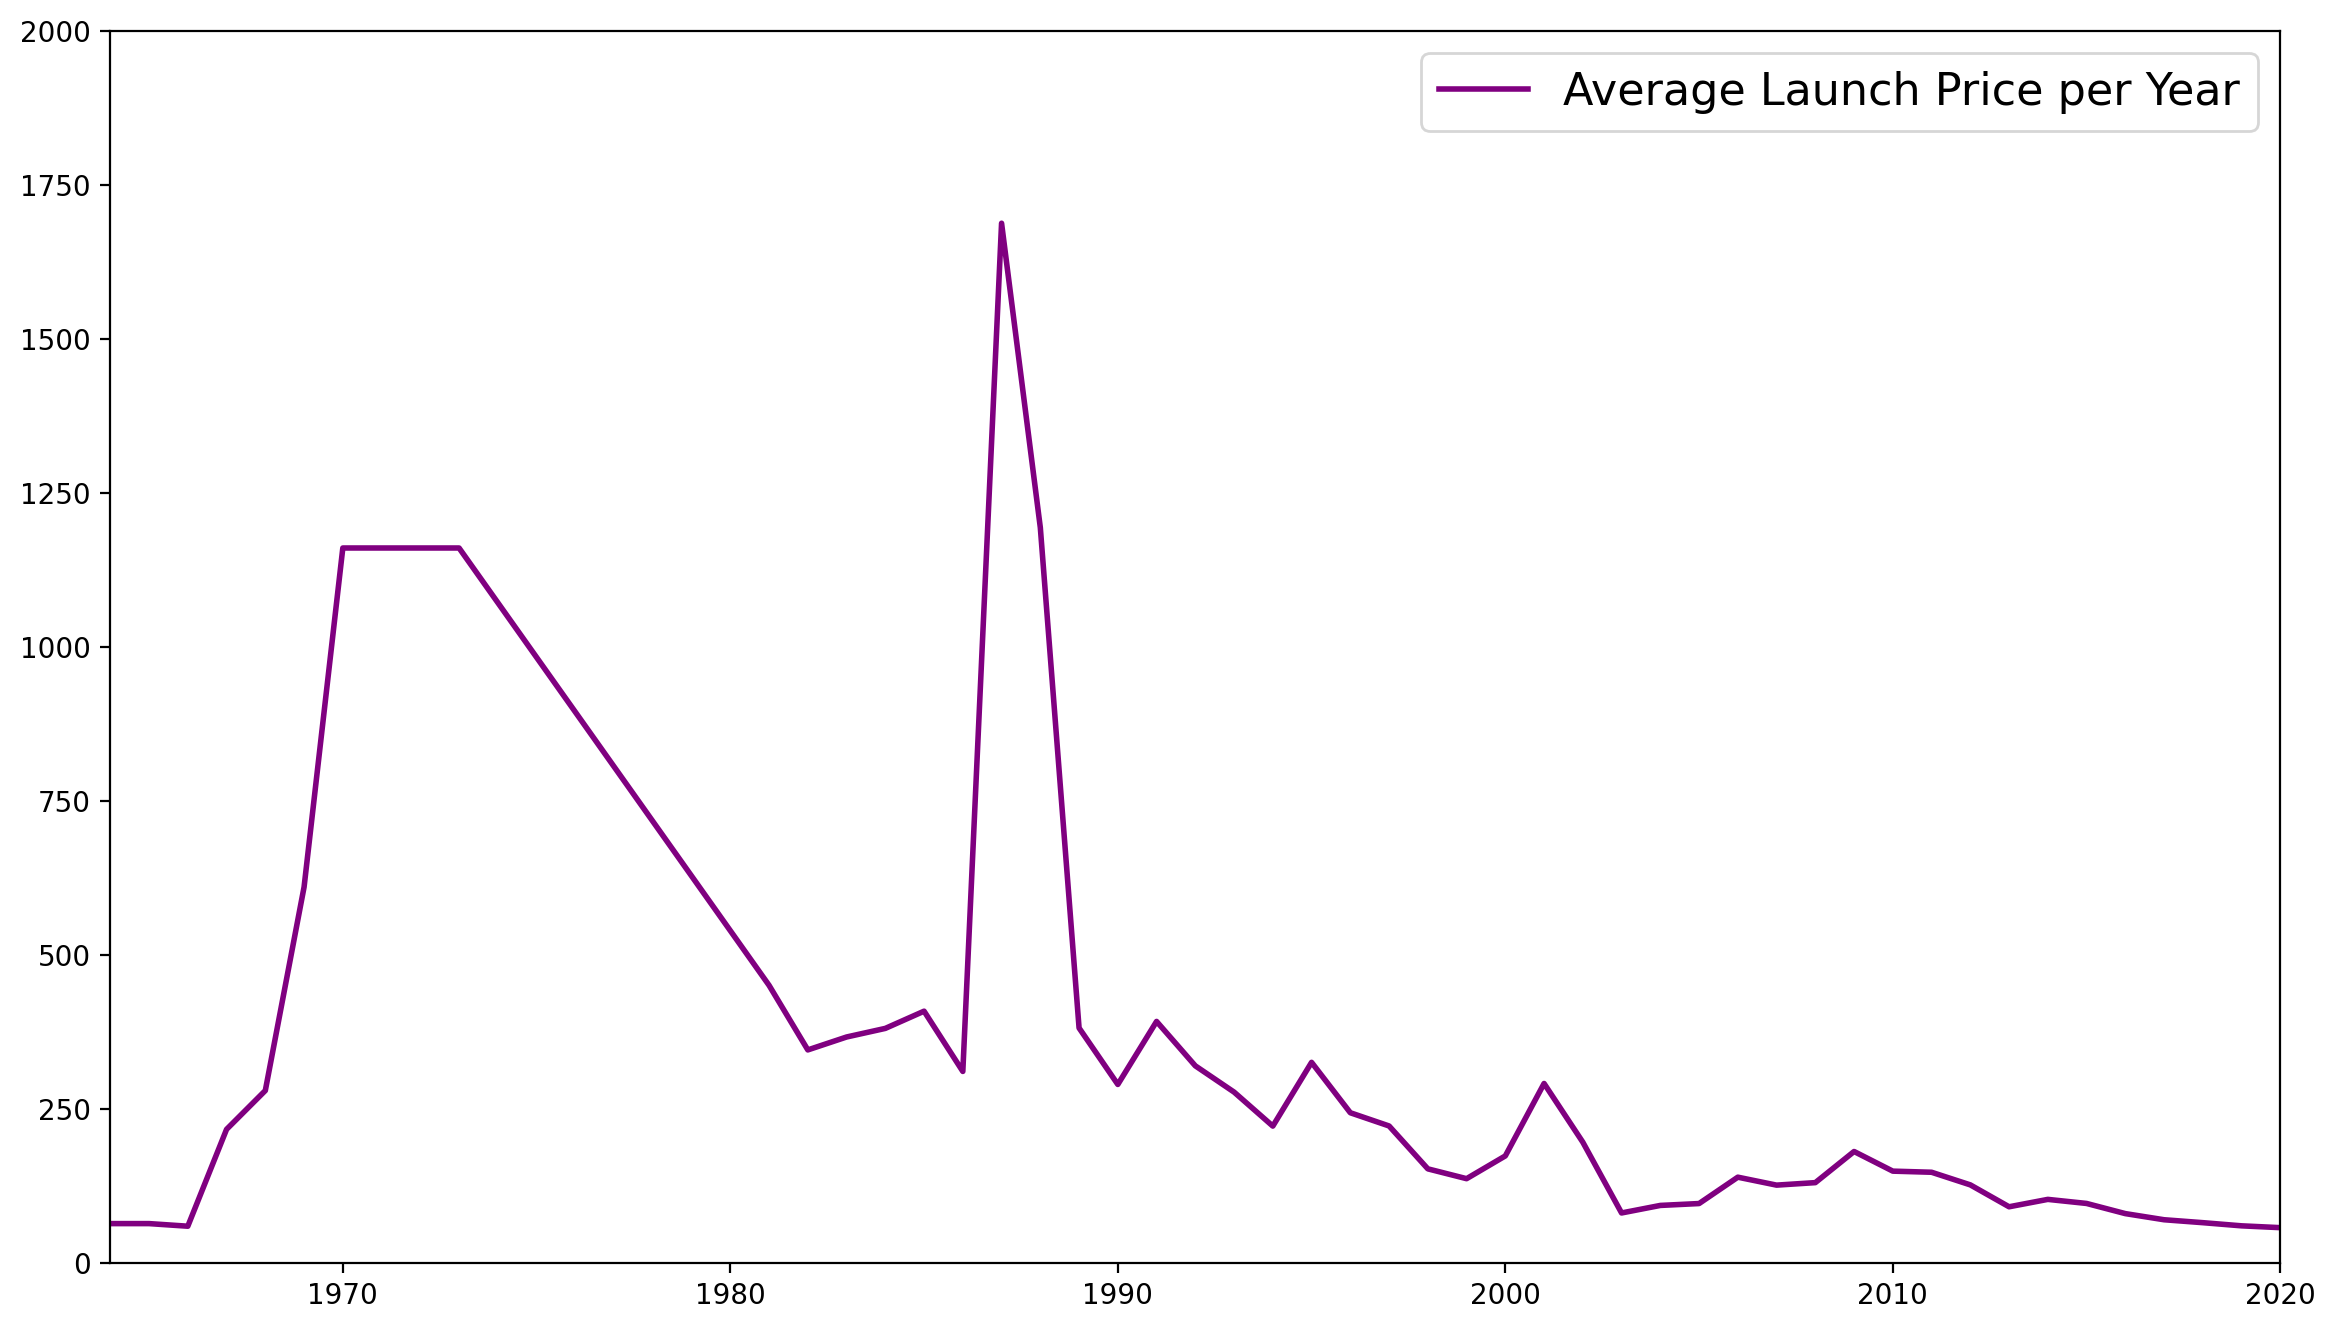

In [183]:
plt.figure(figsize=(14, 8), dpi=200)
plt.plot(mean_price_per_year.index, mean_price_per_year.values, linewidth=2, color='purple', label='Average Launch Price per Year')

plt.xlim(mean_price_per_year.index.min(), mean_price_per_year.index.max())
plt.ylim(0, 2000)
plt.legend(fontsize=16)
plt.show()

# Chart the Number of Launches over Time by the Top 10 Organisations.

How has the dominance of launches changed over time between the different players?

In [187]:
year_org = clean_df.groupby(['Year', 'Organisation']).count()['Detail'].reset_index()
year_org

,Year,Organisation,Detail
0,1964,US Air Force,2
1,1965,US Air Force,2
2,1966,US Air Force,3
3,1967,NASA,1
4,1967,US Air Force,6
...,...,...,...
259,2020,Roscosmos,4
260,2020,SpaceX,13
261,2020,ULA,4
262,2020,VKS RF,1


In [193]:
fig = px.line(year_org,
              x='Year',
              y='Detail',
              color='Organisation',
              title='Launches by Organisation Over Time')

fig.update_layout(
    xaxis=dict(range=[1964, 2020], title='Year'),
    yaxis=dict(range=[0, 30], title='Detail'),
    legend_title_text='Organisation',
    width=1200,
    height=800,
)

fig.show()

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991.

In [200]:
clean_df.sample(10)

,Organisation,Country,Country_ISO,Location,Date,Year,Month,Detail,Rocket_Status,Price,Mission_Status
584,ULA,USA,USA,"SLC-41, Cape Canaveral AFS, Florida, USA",2013-11-18 18:28:00+00:00,2013,11,Atlas V 401 | MAVEN,StatusActive,109.00,Success
621,VKS RF,Russian Federation,RUS,"Site 133/3, Plesetsk Cosmodrome, Russia",2013-01-15 16:24:00+00:00,2013,1,Rokot/Briz KM | Cosmos 2482 to 2484,StatusRetired,41.80,Partial Failure
385,ULA,USA,USA,"SLC-41, Cape Canaveral AFS, Florida, USA",2016-12-18 19:13:00+00:00,2016,12,Atlas V 431 | EchoStar 19,StatusActive,130.00,Success
681,ISRO,India,IND,"Second Launch Pad, Satish Dhawan Space Centre,...",2011-07-15 11:18:00+00:00,2011,7,PSLV-XL | GSAT-12,StatusActive,31.00,Success
1686,NASA,USA,USA,"LC-39B, Kennedy Space Center, Florida, USA",1992-07-31 13:56:00+00:00,1992,7,Space Shuttle Atlantis | STS-46,StatusRetired,450.00,Success
3563,US Air Force,USA,USA,"SLC-4W, Vandenberg AFB, California, USA",1969-04-15 17:30:00+00:00,1969,4,Titan IIIB | OPS 5310,StatusRetired,59.00,Success
189,Arianespace,France,FRA,"ELV-1 (SLV), Guiana Space Centre, French Guian...",2018-11-21 01:42:00+00:00,2018,11,Vega | Mohammed VI-B,StatusActive,37.00,Success
1638,NASA,USA,USA,"LC-39B, Kennedy Space Center, Florida, USA",1993-04-08 05:29:00+00:00,1993,4,Space Shuttle Discovery | STS-56,StatusRetired,450.00,Success
290,CASC,China,CHN,"LC-3, Xichang Satellite Launch Center, China",2017-12-25 19:44:00+00:00,2017,12,"Long March 2C | Yaogan-30 G, H & I",StatusActive,30.80,Success
788,ULA,USA,USA,"SLC-37B, Cape Canaveral AFS, Florida, USA",2009-01-18 02:47:00+00:00,2009,1,Delta IV Heavy | NROL-26,StatusActive,350.00,Success


In [259]:
us_vs_ru = clean_df[(clean_df.Country == "USA") | (clean_df.Country == "Russian Federation") | (clean_df.Country == "Kazakhstan")]
us_vs_ru.head()

,Organisation,Country,Country_ISO,Location,Date,Year,Month,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,USA,USA,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,2020,8,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success
3,Roscosmos,Kazakhstan,KAZ,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,2020,7,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success
4,ULA,USA,USA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,2020,7,Atlas V 541 | Perseverance,StatusActive,145.00,Success
6,Roscosmos,Kazakhstan,KAZ,"Site 31/6, Baikonur Cosmodrome, Kazakhstan",2020-07-23 14:26:00+00:00,2020,7,Soyuz 2.1a | Progress MS-15,StatusActive,48.50,Success
8,SpaceX,USA,USA,"SLC-40, Cape Canaveral AFS, Florida, USA",2020-07-20 21:30:00+00:00,2020,7,Falcon 9 Block 5 | ANASIS-II,StatusActive,50.00,Success


## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches.

In [ ]:
# Note: Kazakstan is the only former Soviet republic with recorded space launches in the dataset.

In [260]:
clean_df.Country.unique()

array(['USA', 'China', 'Kazakhstan', 'Japan', 'New Zealand',
       'Russian Federation', 'France', 'India'], dtype=object)

In [261]:
us_vs_ru['Country'] = us_vs_ru['Country'].replace({'Kazakhstan': 'Soviet Union', 'Russian Federation': 'Soviet Union'})

<ipython-input-261-a91ec273174f>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [262]:
us_ru_total = us_vs_ru.groupby('Country').count()['Detail'].reset_index()

In [264]:
us_ru_pie = px.pie(us_ru_total,
                   labels='Country',
                   values='Detail',
                   title='Launches made by USA and USSR/Russia/former Soviet Republics',
                   names='Country')
us_ru_pie.update_traces(textposition='outside', textinfo='percent+label')
us_ru_pie.show()

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

In [268]:
us_ru_year = us_vs_ru.groupby(['Country', 'Year']).count()['Detail'].reset_index()
us_ru_year

,Country,Year,Detail
0,Soviet Union,1987,1
1,Soviet Union,1988,1
2,Soviet Union,2000,2
3,Soviet Union,2002,2
4,Soviet Union,2003,2
...,...,...,...
66,USA,2016,21
67,USA,2017,27
68,USA,2018,29
69,USA,2019,19


In [269]:
us_ru_year_bar = px.bar(us_ru_year, x='Year', y='Detail', color='Country', barmode='group')
us_ru_year_bar.update_layout(xaxis_title='Year',
                             yaxis_title='Number of Launches')
us_ru_year_bar.show()

## Chart the Total Number of Mission Failures Year on Year.

In [287]:
us_vs_ru.info()

<class 'pandas.core.frame.DataFrame'>
Index: 590 entries, 0 to 4020
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   Organisation    590 non-null    object             
 1   Country         590 non-null    object             
 2   Country_ISO     590 non-null    object             
 3   Location        590 non-null    object             
 4   Date            586 non-null    datetime64[ns, UTC]
 5   Year            586 non-null    Int64              
 6   Month           586 non-null    Int64              
 7   Detail          590 non-null    object             
 8   Rocket_Status   590 non-null    object             
 9   Price           590 non-null    float64            
 10  Mission_Status  590 non-null    object             
dtypes: Int64(2), datetime64[ns, UTC](1), float64(1), object(7)
memory usage: 56.5+ KB


In [291]:
us_vs_ru['Mission_Status'] = us_vs_ru['Mission_Status'].replace({'Partial Failure': 'Failure', 'Prelaunch Failure': 'Failure'})
us_ru_failure = us_vs_ru[us_vs_ru.Mission_Status == 'Failure'].groupby(['Country', 'Year'], as_index=False).count()
us_ru_failure = us_ru_failure.sort_values('Year')[['Country', 'Year', 'Detail']].groupby(['Country', 'Year']).sum().groupby(level=[0]).cumsum()
us_ru_failure.reset_index(inplace=True)

<ipython-input-291-a84747890655>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [292]:
us_ru_failure

,Country,Year,Detail
0,Soviet Union,2005,1
1,Soviet Union,2006,2
2,Soviet Union,2011,3
3,Soviet Union,2013,5
4,Soviet Union,2017,6
5,USA,1964,1
6,USA,1967,2
7,USA,1968,3
8,USA,1986,4
9,USA,1990,5


In [316]:
us_ru_failure_line = px.line(us_ru_failure, x='Year', y='Detail', color='Country')
us_ru_failure_line.update_layout(xaxis_title='Year',
                                 yaxis_title='Number of Cumulative Launches which Failed')
us_ru_failure_line.show()

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time?

In [312]:
filtered_data = us_vs_ru.groupby(['Country', 'Year', 'Mission_Status']).count()['Detail'].reset_index()
failures = filtered_data[filtered_data['Mission_Status'] == 'Failure']
failure_rate = failures.groupby(['Country', 'Year']).size() / filtered_data.groupby(['Country', 'Year'])['Detail'].sum()
failure_rate = failure_rate.reset_index(name='Failure Rate')
failure_rate.fillna(0, inplace=True)
failure_rate

,Country,Year,Failure Rate
0,Soviet Union,1987,0.00
1,Soviet Union,1988,0.00
2,Soviet Union,2000,0.00
3,Soviet Union,2002,0.00
4,Soviet Union,2003,0.00
...,...,...,...
66,USA,2016,0.05
67,USA,2017,0.00
68,USA,2018,0.00
69,USA,2019,0.00


In [313]:
failure_rate_line = px.line(failure_rate, x='Year', y='Failure Rate', color='Country')
failure_rate_line.update_layout(xaxis_title='Year',
                                 yaxis_title='Proportion of Failed Launches')
failure_rate_line.show()

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches?

In [315]:
launches = us_vs_ru.groupby(['Country', 'Year'], as_index=False).count().sort_values('Year')[['Year', 'Country', 'Detail']]
total_launches = launches.groupby(['Country', 'Year']).sum().groupby(level=[0]).cumsum().reset_index()
total_launches

,Country,Year,Detail
0,Soviet Union,1987,1
1,Soviet Union,1988,2
2,Soviet Union,2000,4
3,Soviet Union,2002,6
4,Soviet Union,2003,8
...,...,...,...
66,USA,2016,393
67,USA,2017,420
68,USA,2018,449
69,USA,2019,468


In [318]:
total_launches_line = px.line(total_launches, x='Year', y='Detail', color='Country')
total_launches_line.update_layout(xaxis_title='Year',
                                 yaxis_title='Total Number of Cumulative Launches')
total_launches_line.show()

In [320]:
# Removing failed launches from consideration:
success_launches = us_vs_ru[us_vs_ru.Mission_Status == 'Success'].groupby(['Country', 'Year'], as_index=False).count().sort_values('Year')[['Year', 'Country', 'Detail']]
total_success_launches = success_launches.groupby(['Country', 'Year']).sum().groupby(level=[0]).cumsum().reset_index()
total_success_launches

,Country,Year,Detail
0,Soviet Union,1987,1
1,Soviet Union,1988,2
2,Soviet Union,2000,4
3,Soviet Union,2002,6
4,Soviet Union,2003,8
...,...,...,...
66,USA,2016,368
67,USA,2017,395
68,USA,2018,424
69,USA,2019,443


In [324]:
total_success_launches_line = px.line(total_success_launches, x='Year', y='Detail', color='Country')
total_success_launches_line.update_layout(xaxis_title='Year',
                                          yaxis_title='Total Number of Cumulative Successful Launches')
total_success_launches_line.show()

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020?

In [329]:
launches_by_org = us_vs_ru.groupby(['Country', 'Year', 'Organisation']).count()['Detail'].reset_index()
launches_by_org.head()

,Country,Year,Organisation,Detail
0,Soviet Union,1987,RVSN USSR,1
1,Soviet Union,1988,RVSN USSR,1
2,Soviet Union,2000,Eurockot,1
3,Soviet Union,2000,Kosmotras,1
4,Soviet Union,2002,Eurockot,2


In [331]:
launches_by_org_line = px.line(launches_by_org, x='Year', y='Detail', color='Organisation', hover_name='Country')
launches_by_org_line.update_layout(xaxis_title='Year',
                                   yaxis_title='Number of Launches per Year by Organisation')
launches_by_org_line.show()